In [4]:
import pandas as pd
# CSVデータの読み込み
iris = pd.read_csv("iris.data")
# 基本情報の表示
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [6]:
# 行数の表示
len(iris)

150

In [8]:
# 行数と列数の表示
iris.shape

(150, 5)

In [12]:
# 先頭の５行を表示
iris.head()
# 末尾の５行を表示
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [18]:
# 列名を指定して表示
#iris["SepalLength"]
iris.SepalLength.head(3)
# 複数列を指定
iris[["SepalLength", "SepalWidth"]].tail()

,SepalLength,SepalWidth
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4
149,5.9,3.0


In [20]:
# 特定のレコード範囲を指定
iris[2:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# 品種ごとにデータを区分け
setosa = iris[iris.Class == "Iris-setosa"]
versicolor = iris[iris.Class == "Iris-versicolor"]
virgincia = iris[iris.Class == "Iris-virginica"]

In [26]:
# 基本統計量の算出
setosa.sum() # 合計値
setosa.min() # 最小値
setosa.max() # 最大値
setosa.mean() # 平均値
setosa.median() # 中央値
setosa.var() # 分散
setosa.std() # 標準偏差

SepalLength    0.352490
SepalWidth     0.381024
PetalLength    0.173511
PetalWidth     0.107210
dtype: float64

In [28]:
import numpy as np
# ピボットテーブルの作成

pd.pivot_table(iris, index="Class", aggfunc=np.mean)

,PetalLength,PetalWidth,SepalLength,SepalWidth
Class,,,,
Iris-setosa,1.464,0.244,5.006,3.418
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


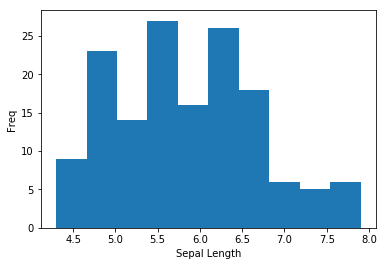

In [33]:
import matplotlib.pyplot as plt
# ヒストグラムの作成
plt.hist(iris.SepalLength)
plt.xlabel("Sepal Length") 
plt.ylabel("Freq") # Frequency: 度数
plt.show() # 表示

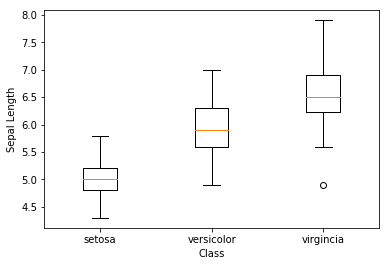

In [34]:
# 品種ごとのがく片の長さに対する箱ひげ図の作成
data = [setosa.SepalLength, 
        versicolor.SepalLength,
        virgincia.SepalLength]
plt.boxplot(data) # 箱ひげ図の作成
plt.xlabel("Class") # 品種
plt.ylabel("Sepal Length") # がく片の長さ
plt.setp(plt.gca(), xticklabels=["setosa", 
                                 "versicolor", 
                                 "virgincia"])
plt.show()


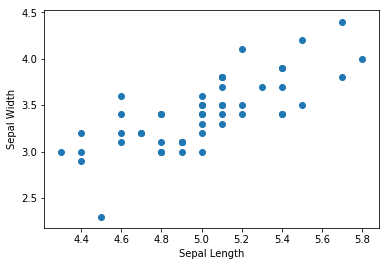

In [36]:
# 散布図の作成
plt.scatter(setosa.SepalLength, setosa.SepalWidth) 
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [39]:
import sklearn.linear_model as lm
# 単回帰分析を行う

# 相関係数の算出
corr = np.corrcoef(setosa.SepalLength, 
                   setosa.SepalWidth)
corr

array([[ 1.        ,  0.74678037],
       [ 0.74678037,  1.        ]])

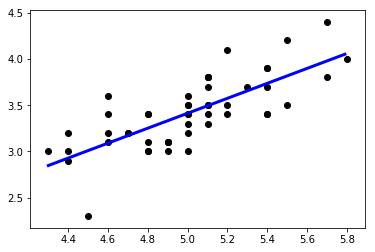

[[ 0.80723367]]
[-0.62301173]


In [49]:
lr = lm.LinearRegression() # 線形回帰モデルの作成
x = setosa[["SepalLength"]]
y = setosa[["SepalWidth"]]
lr.fit(x, y) # モデルにデータを当て嵌め
# arange([start], stop, [step], [dtype])
px = np.arange(x.min(), x.max(), .01)[:, np.newaxis]
py = lr.predict(px) # 線形回帰予測モデルの作成
plt.plot(px, py, color="blue", 
                 linewidth=3) # 図のプロット
plt.scatter(x, y, color="black") # 散布図の作成
plt.show()
print(lr.coef_) # 回帰係数
print(lr.intercept_) # 切片